### Using the Fourier Transform in Python


_Author: Jorge Vera Moreno_


The Fourier transform decomposes a function of time (a signal) into the frequencies that make it up. 

The Fourier transform of a function of time itself is a complex-valued function of frequency, whose absolute value represents the amount of that frequency present in the original function, and whose complex argument is the phase offset of the basic sinusoid in that frequency. 

Formally:
$$ g(\omega) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(t) e^{i\omega t} dt $$

Here, we will see a few examples of the Fourier Transform in Python. First we import the modules we need:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

We will use a square-wave with $f(x) = +1$ for $0 \leq x \leq 0.5$ and $-1$ for $0.5 \leq x \leq 1$, over a single period:

In [2]:
square = np.ones(1000) #create array of 1000 ones
square[500:1000]=-1 #change the last 500 points to -1

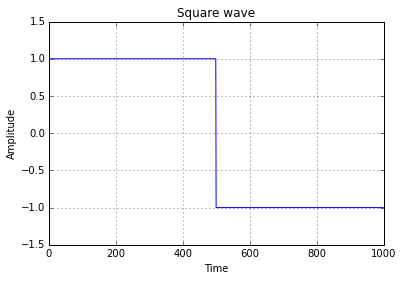

In [3]:
plt.plot(square) #Plot the function
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Square wave")
plt.ylim(-1.5,1.5)
plt.grid()

We can now plot the Fourier Transform of this function. To do this, we will use the Fast Fourier Transform that is built into Numpy as 'np.fft.rfft':

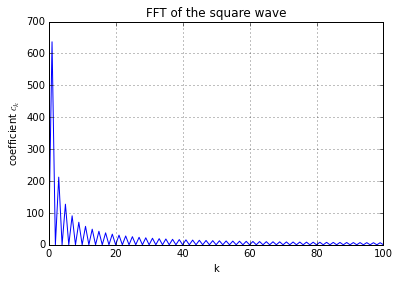

In [4]:
square_fft = np.fft.rfft(square) #find the FFT of the square wave
plt.plot(abs(square_fft)) #plot the absolute value of the coefficients
plt.xlabel('k')
plt.ylabel('coefficient $c_k$')
plt.title("FFT of the square wave")
plt.xlim(0,100)
plt.grid()

The coefficients $c_k$ are the frequencies that when plugged in the $\cos$ and $\sin$ terms in the Fourier expansion give the original function. The $c_k$ obtained are expected as a few terms give the shape of the square wave in terms of $\cos$ and $\sin$, and the rest refine this shape.

We will now try a square pulse defined over the region $0\leq x \leq 1000$, with $f(x) = +1$ for $0 \leq x \leq 10$ and zero elsewhere:

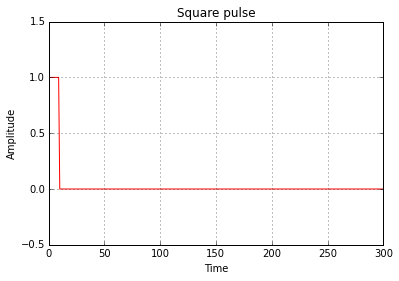

In [5]:
pulse = np.zeros(1000) #create array of 1000 zeros
pulse[0:10] = 1 #change the points 0 - 10 to 1
plt.plot(pulse, 'r') #Plot the pulse
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Square pulse")
plt.xlim(0,300)
plt.ylim(-0.5,1.5)
plt.grid()

As before, we find the FFT of this function:

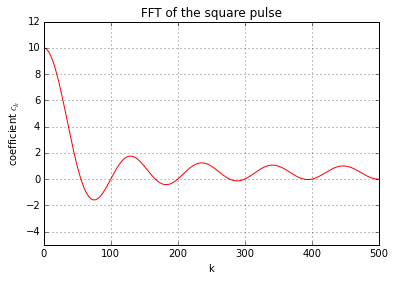

In [6]:
pulse_fft = np.fft.rfft(pulse) #calculate FFT of the sq. pulse
plt.plot(pulse_fft.real, 'r') #plot the real part of the FFT
plt.xlabel('k')
plt.ylabel('coefficient $c_k$')
plt.title("FFT of the square pulse")
plt.ylim(-5,12)
plt.grid()

The $\Re(c_k)$ of an ideal pulse are constant, whereas the $\Re(c_k)$ of a square pulse (as in this case) are related to the $\mathsf{sinc}$ function:

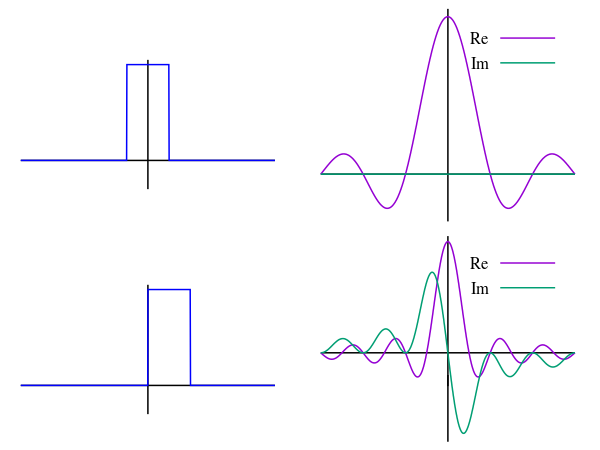

In [7]:
Image(filename='square.png')

We will now import two files with time-dependent data of sound, and use the FFT to derive information about them. We will first load the files and then plot the first 2000 datapoints of each set, then plot a sub-sample of the data every 500th point and then calculate the FFT of each file and plot the first 10000 coefficients:

In [8]:
piano = np.loadtxt("piano.txt",float) # import floats from the data file
trump = np.loadtxt("trumpet.txt",float)

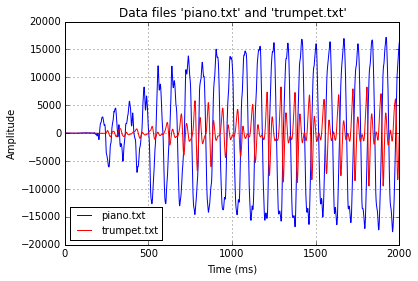

In [9]:
piano_fft = np.fft.rfft(piano) #calculate the FFT of the data
trump_fft = np.fft.rfft(trump)
plt.plot(piano[:2000], label='piano.txt') #plot the first 2000 points of the files
plt.plot(trump[:2000], 'r',label='trumpet.txt')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title("Data files 'piano.txt' and 'trumpet.txt'")
plt.legend(loc="lower left",prop={'size':10})
plt.grid()

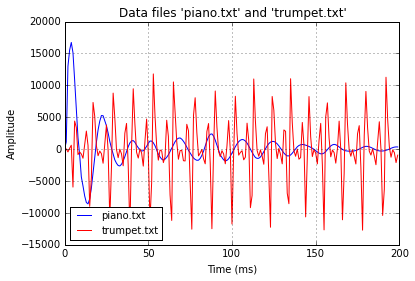

In [10]:
plt.plot(piano[::500], label='piano.txt') #plot a sub-sample of the data every 500th point
plt.plot(trump[::500], 'r', label='trumpet.txt')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title("Data files 'piano.txt' and 'trumpet.txt'")
plt.legend(loc="lower left",prop={'size':10})
plt.grid()

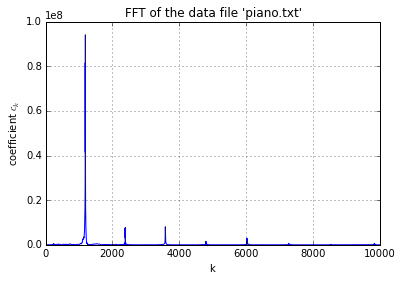

In [11]:
plt.plot(abs(piano_fft[:10000])) #plot the first 10000 coefficients of the FFT
plt.xlabel('k')
plt.ylabel('coefficient $c_k$')
plt.title("FFT of the data file 'piano.txt'")
plt.grid()

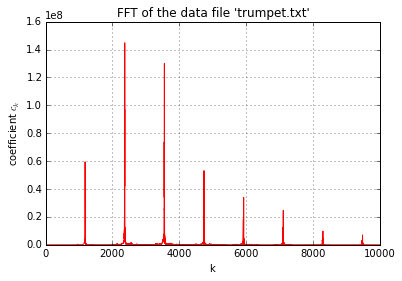

In [12]:
plt.plot(abs(trump_fft[:10000]), 'r') #plot the first 10000 coefficients of the FFT
plt.xlabel('k')
plt.ylabel('coefficient $c_k$')
plt.title("FFT of the data file 'trumpet.txt'")
plt.grid()

We will now plot both FFTs near the fundamental frequency (lowest frequency value):

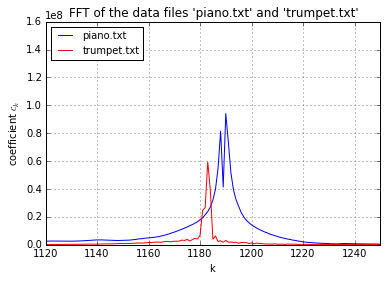

In [13]:
plt.plot(abs(piano_fft[:10000]), label='piano.txt')
plt.plot(abs(trump_fft[:10000]), 'r', label='trumpet.txt')
plt.xlabel('k')
plt.ylabel('coefficient $c_k$')
plt.title("FFT of the data files 'piano.txt' and 'trumpet.txt'")
plt.legend(loc="upper left",prop={'size':10})
plt.xlim(1120,1250)
plt.grid()

Different musical instruments do not vibrate at a single frequency: a note involves vibrations at many frequencies, the harmonics. The relative pitch and loudness of the harmonics gives the note a characteristic sound, the timbre, of the instrument. This is why instruments playing the same note won't have the same Fourier Transform; the harmonics of each instrument are different.

The frequency $f$ is related to the Fourier coefficient index $k$ by 
$$ f = \frac{\nu k}{N}$$

where $\nu$ is the sampling rate (44.1 kHz in this case) and $N$ the total number of sampled data points. We can now calculate the frequency of the note played:

In [14]:
freq = 1185*44.1*1000/np.size(piano)
print("The note played had a frequency of",freq,"Hz")

('The note played had a frequency of', 522.585, 'Hz')
